# Import All Library

In [19]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Load Data

In [27]:
data=yf.download('MSFT',start='2015-01-01',end='2024-01-01')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,40.232845,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,39.862873,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,39.277794,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,39.776840,29114100
2015-01-08,46.750000,47.750000,46.720001,47.590000,40.946987,29645200
...,...,...,...,...,...,...
2023-12-22,373.679993,375.179993,372.709991,374.579987,372.543915,17091100
2023-12-26,375.000000,376.940002,373.500000,374.660004,372.623505,12673100
2023-12-27,373.690002,375.059998,372.809998,374.070007,372.036713,14905400


# EDA Analysis

<Axes: xlabel='Date'>

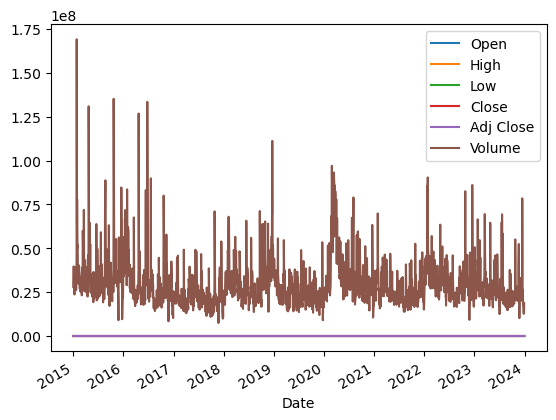

In [13]:
data.plot()

<Axes: xlabel='Date'>

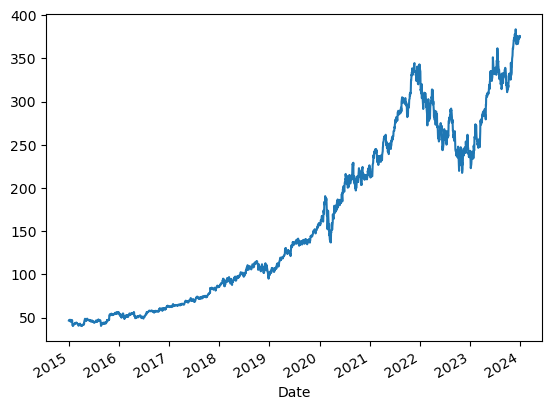

In [6]:
data['Open'].plot()

<Axes: xlabel='Date'>

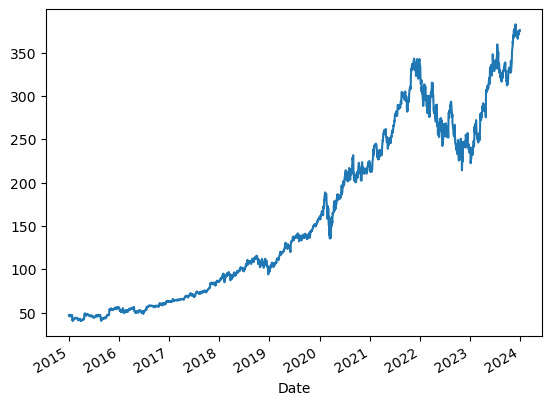

In [7]:
data['Close'].plot()

<Axes: xlabel='Date'>

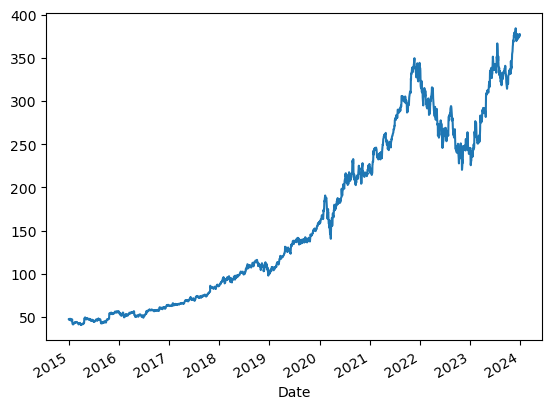

In [8]:
data['High'].plot()

<Axes: xlabel='Date'>

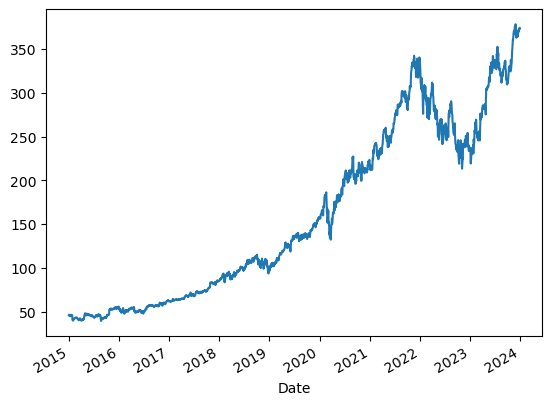

In [9]:
data['Low'].plot()

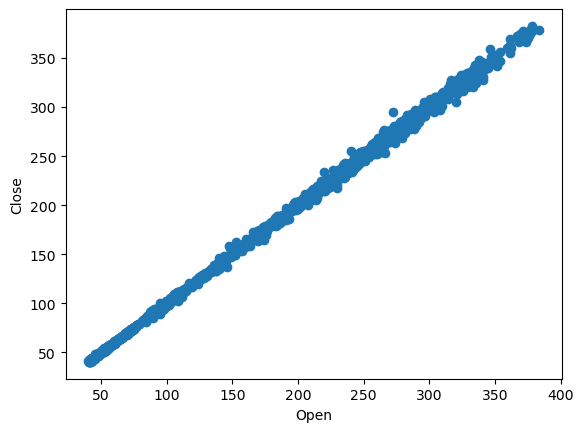

In [12]:
plt.xlabel('Open')
plt.ylabel('Close')
plt.scatter(x=data['Open'],y=data['Close'])

<Axes: >

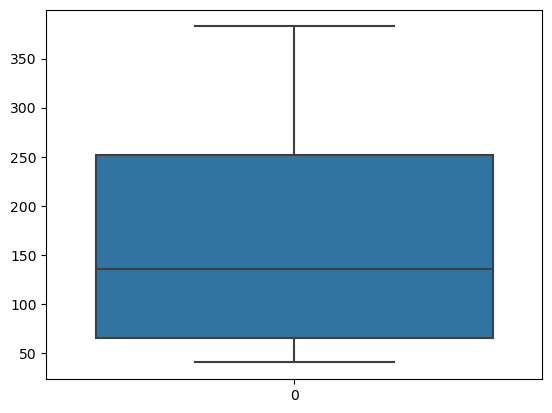

In [15]:
sns.boxplot(data['Close'])

<Axes: xlabel='Close', ylabel='Density'>

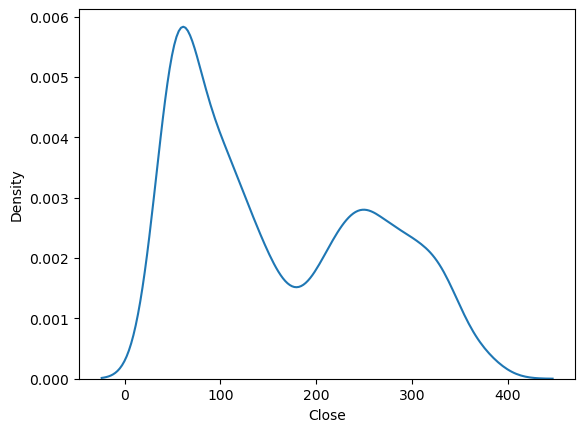

In [16]:
sns.kdeplot(data['Close'])

<Axes: >

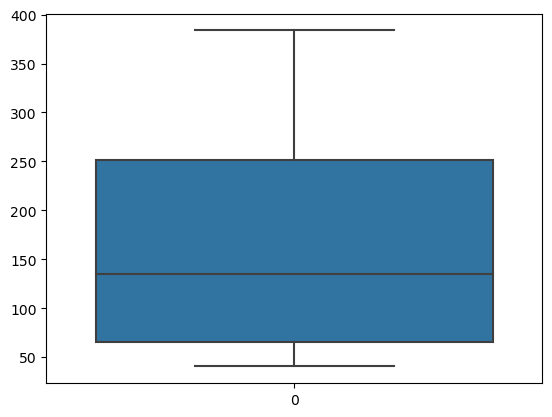

In [17]:
sns.boxplot(data['Open'])

<Axes: xlabel='Open', ylabel='Density'>

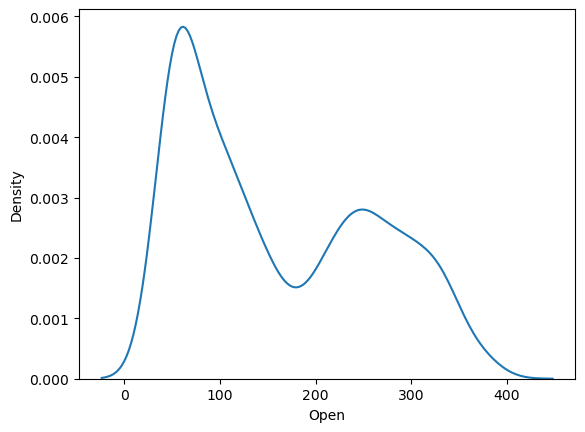

In [18]:
sns.kdeplot(data['Open'])

# Train Test Split

In [29]:
data_test=yf.download('MSFT',start='2024-01-02',end='2024-10-28')
data_test

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,373.859985,375.899994,366.769989,370.869995,368.854095,25258600
2024-01-03,369.010010,373.260010,368.510010,370.600006,368.585571,23083500
2024-01-04,370.670013,373.100006,367.170013,367.940002,365.940002,20901500
2024-01-05,368.970001,372.059998,366.500000,367.750000,365.751038,20987000
2024-01-08,369.299988,375.200012,369.010010,374.690002,372.653351,23134000
...,...,...,...,...,...,...
2024-10-21,416.119995,418.959991,413.750000,418.779999,418.779999,14206100
2024-10-22,418.489990,430.579987,418.040009,427.510010,427.510010,25482200
2024-10-23,430.859985,431.079987,422.529999,424.600006,424.600006,19654400


In [45]:
X_train=data.drop(['Close','Adj Close'],axis=1)
y_train=data['Close']
print(X_train)
print(y_train)

                  Open        High         Low    Volume
Date                                                    
2015-01-02   46.660000   47.419998   46.540001  27913900
2015-01-05   46.369999   46.730000   46.250000  39673900
2015-01-06   46.380001   46.750000   45.540001  36447900
2015-01-07   45.980000   46.459999   45.490002  29114100
2015-01-08   46.750000   47.750000   46.720001  29645200
...                ...         ...         ...       ...
2023-12-22  373.679993  375.179993  372.709991  17091100
2023-12-26  375.000000  376.940002  373.500000  12673100
2023-12-27  373.690002  375.059998  372.809998  14905400
2023-12-28  375.369995  376.459991  374.160004  14327000
2023-12-29  376.000000  377.160004  373.480011  18723000

[2264 rows x 4 columns]
Date
2015-01-02     46.759998
2015-01-05     46.330002
2015-01-06     45.650002
2015-01-07     46.230000
2015-01-08     47.590000
                 ...    
2023-12-22    374.579987
2023-12-26    374.660004
2023-12-27    374.070007
2023

In [31]:
X_test=data_test.drop(['Close','Adj Close'],axis=1)
y_test=data_test['Close']
print(X_test)
print(y_test)

                  Open        High         Low    Volume
Date                                                    
2024-01-02  373.859985  375.899994  366.769989  25258600
2024-01-03  369.010010  373.260010  368.510010  23083500
2024-01-04  370.670013  373.100006  367.170013  20901500
2024-01-05  368.970001  372.059998  366.500000  20987000
2024-01-08  369.299988  375.200012  369.010010  23134000
...                ...         ...         ...       ...
2024-10-21  416.119995  418.959991  413.750000  14206100
2024-10-22  418.489990  430.579987  418.040009  25482200
2024-10-23  430.859985  431.079987  422.529999  19654400
2024-10-24  425.329987  425.980011  422.399994  13581600
2024-10-25  426.760010  432.519989  426.570007  16888400

[207 rows x 4 columns]
Date
2024-01-02    370.869995
2024-01-03    370.600006
2024-01-04    367.940002
2024-01-05    367.750000
2024-01-08    374.690002
                 ...    
2024-10-21    418.779999
2024-10-22    427.510010
2024-10-23    424.600006
2024-

# Data Preprocessing

In [47]:
# Scale the data
sc=StandardScaler()
X_scaler=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

# Train the Model

In [20]:
lr=LinearRegression()
rg=Ridge()
ls=Lasso()
sgdr=SGDRegressor()
elstcnet=ElasticNet()

In [54]:
lr.fit(X_train,y)
rg.fit(X_train,y)
ls.fit(X_train,y)
sgdr.fit(X_train,y)
elstcnet.fit(X_train,y)

C:\Users\mpc27\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.106e+03, tolerance: 2.275e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\mpc27\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.862e+03, tolerance: 2.275e+03
  model = cd_fast.enet_coordinate_descent(


ElasticNet()

# Evaluate the Model

In [64]:
y_pred_lr=lr.predict(X_test)
y_pred_rg=rg.predict(X_test)
y_pred_ls=ls.predict(X_test)
y_pred_sgdr=sgdr.predict(X_test)
y_pred_elstcnet=elstcnet.predict(X_test)

In [65]:
# Before scalling the data
print("MAE of Linear Regression",mean_absolute_error(y_test,y_pred_lr))
print("MAE of Ridge Regression",mean_absolute_error(y_test,y_pred_rg))
print("MAE of Lasso Regression",mean_absolute_error(y_test,y_pred_ls))
print("MAE of SGD Regression",mean_absolute_error(y_test,y_pred_sgdr))
print("MAE of Elasticnet Regression",mean_absolute_error(y_test,y_pred_elstcnet))

MAE of Linear Regression 1.4366032862075666
MAE of Ridge Regression 1.436613276430505
MAE of Lasso Regression 2.888987386935573
MAE of SGD Regression 4.462812628519924e+23
MAE of Elasticnet Regression 2.83536531769099


In [43]:
# After scalling the data
print("MAE of Linear Regression",mean_absolute_error(y_test,y_pred_lr))
print("MAE of Ridge Regression",mean_absolute_error(y_test,y_pred_rg))
print("MAE of Lasso Regression",mean_absolute_error(y_test,y_pred_ls))
print("MAE of SGD Regression",mean_absolute_error(y_test,y_pred_sgdr))
print("MAE of Elasticnet Regression",mean_absolute_error(y_test,y_pred_elstcnet))

MAE of Linear Regression 1.4366032864297176
MAE of Ridge Regression 1.972468478545816
MAE of Lasso Regression 3.781636095161473
MAE of SGD Regression 2.2841450797624145
MAE of Elasticnet Regression 37.41951623292929


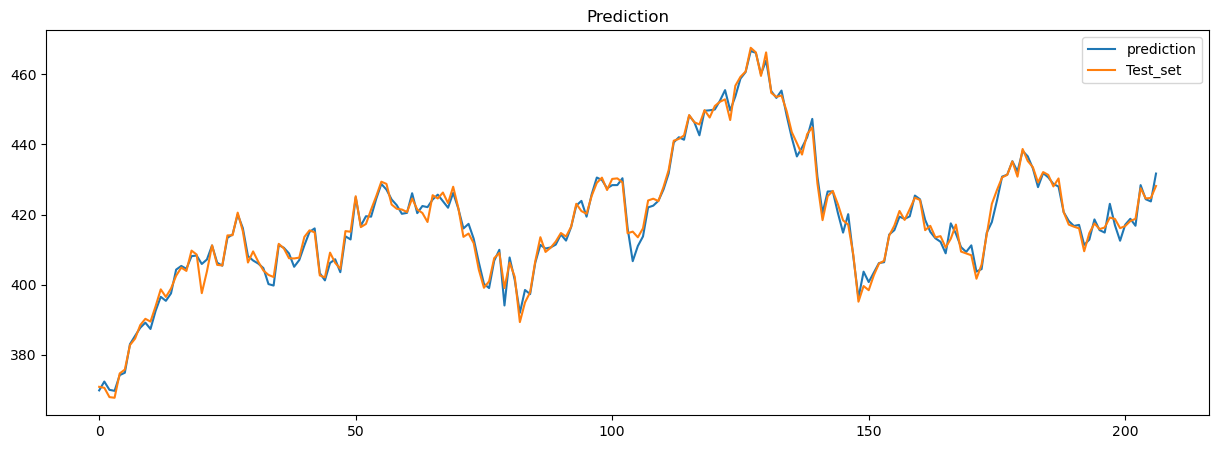

In [60]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(y_pred_lr)
plt.plot(y_test.values)
plt.legend(['prediction', 'Test_set'])
plt.title('Prediction')
plt.show()

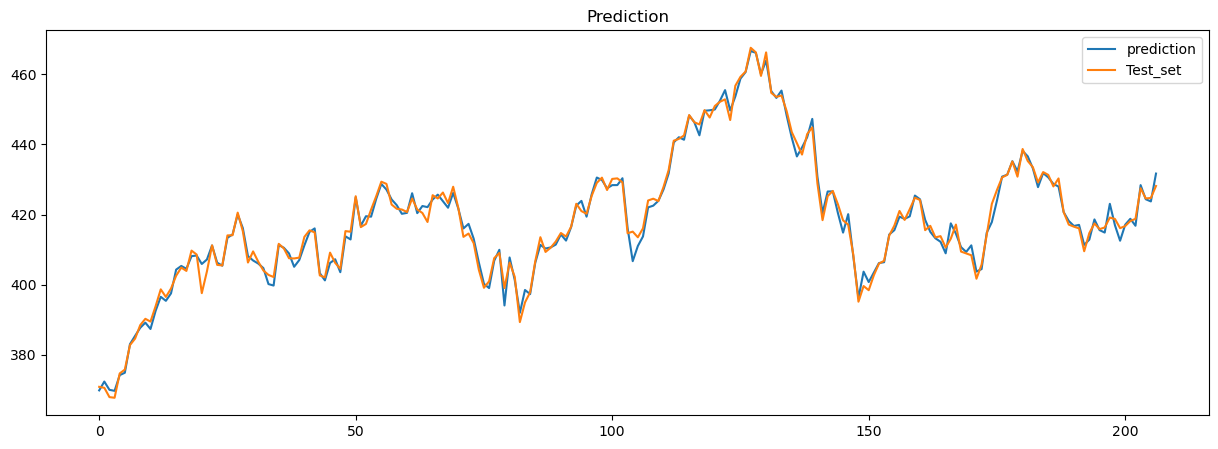

In [61]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(y_pred_rg)
plt.plot(y_test.values)
plt.legend(['prediction', 'Test_set'])
plt.title('Prediction')
plt.show()

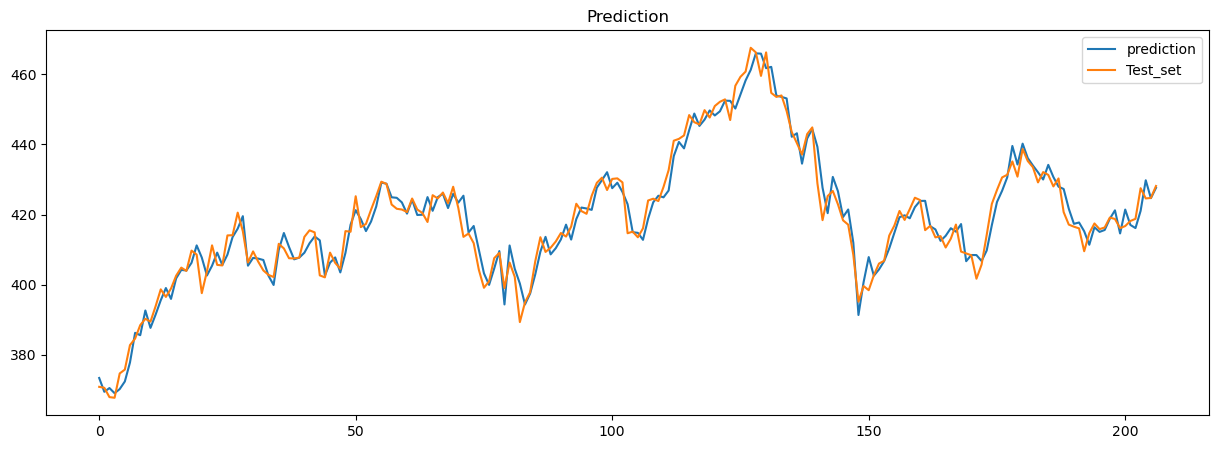

In [62]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(y_pred_ls)
plt.plot(y_test.values)
plt.legend(['prediction', 'Test_set'])
plt.title('Prediction')
plt.show()

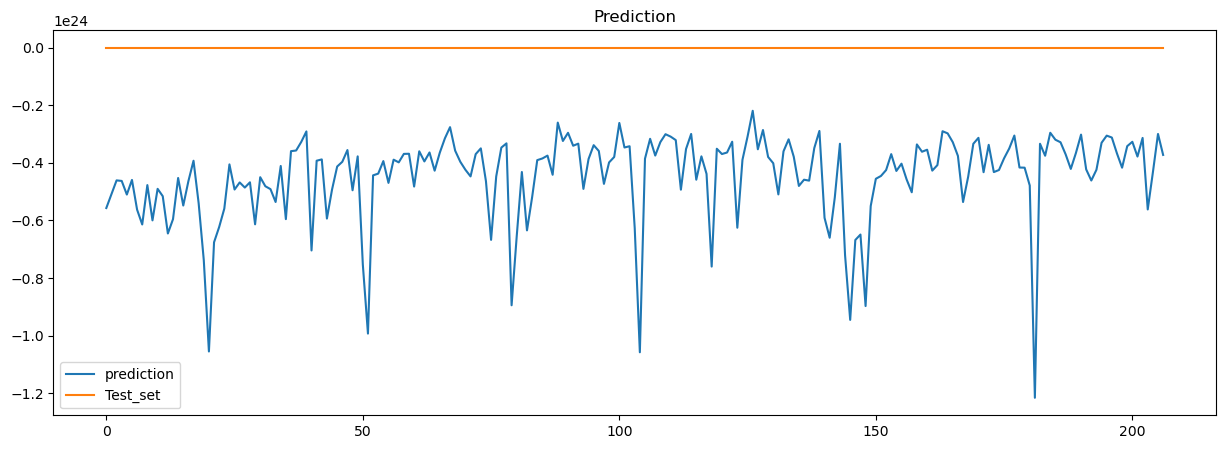

In [68]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(y_pred_sgdr)
plt.plot(y_test.values)
plt.legend(['prediction', 'Test_set'])
plt.title('Prediction')
plt.show()

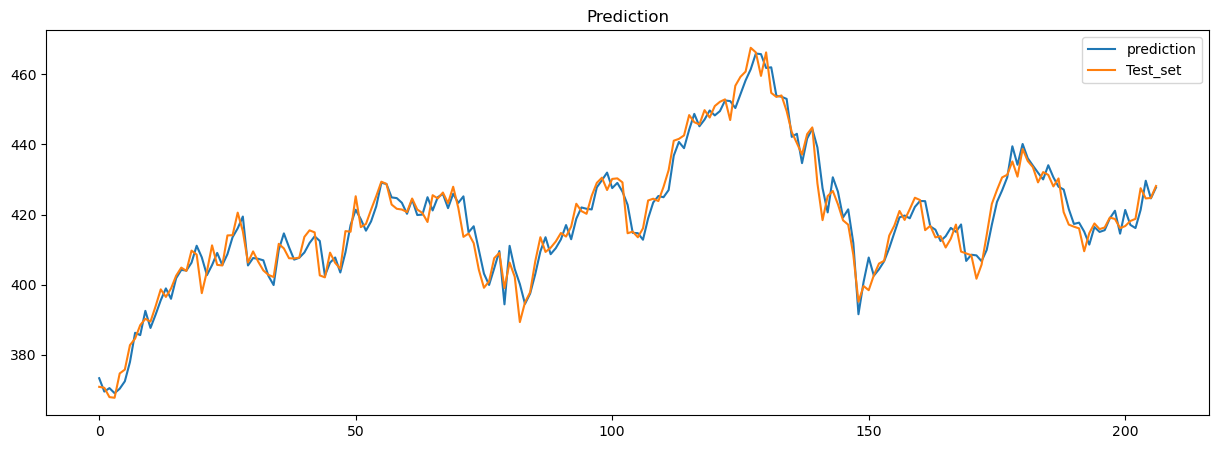

In [67]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(y_pred_elstcnet)
plt.plot(y_test.values)
plt.legend(['prediction', 'Test_set'])
plt.title('Prediction')
plt.show()

# Pickle the Model

In [57]:
import pickle
pickle.dump(lr,open('Microsoft_Model.pkl','wb'))